In [1]:
from ordering import PartialOrder

import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def order_as_img(p: PartialOrder, path=None, title=None):
    g = nx.DiGraph()

    g.add_nodes_from(range(p.size))
    edges = [(c, node) for (node, childs) in p.childs.items() for c in childs]
    g.add_edges_from(edges)

    pos = {node: (0, 1) for node in g.nodes()}
    i = 0
    for node in g.nodes():
        pos[node] = (i, 0)
        i += 1

    nx.draw_networkx_nodes(g, pos, alpha=0.4)
    nx.draw_networkx_edges(g, pos, connectionstyle='arc3, rad=0.2')

    labels = {node: str(node) for node in g.nodes}
    nx.draw_networkx_labels(g, pos, labels)
    plt.title(title)

    if path:
        # print(f'saving file to {path}')
        plt.savefig(path, format="png", dpi=100)
        plt.close()
    else:
        plt.show()

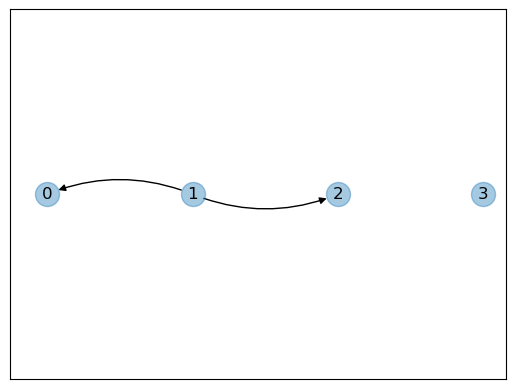

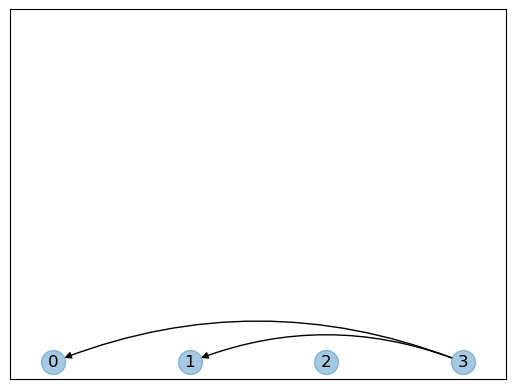

In [3]:
a = PartialOrder(4).with_comparison(1, 0).with_comparison(1, 2)
b = PartialOrder(4).with_comparison(3, 0).with_comparison(3, 1)

order_as_img(a)
order_as_img(b)

order_as_img(a, "a.png")

In [4]:
import main
import hashlib
from networkx.drawing.nx_pydot import graphviz_layout
from PIL import Image
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def path(p: PartialOrder):
    hash_str = hashlib.sha1(str(hash(p)).encode()).hexdigest()
    return f"img/{hash_str}.png"

def make_tree(tree):
    dec_tree = nx.DiGraph()

    def bfs(tree, father=None):
        if not tree:
            return

        node, depth, cmp, left, right = tree
        order_as_img(node, path(node), f"d={depth} cmp={cmp}")

        if father:
            dec_tree.add_edge(path(father), path(node))
        
        bfs(left, node)
        bfs(right, node)

    bfs(tree)
    return dec_tree

def print_nxtree(nxtree):

    plt.figure(figsize=(50, 50))

    pos = graphviz_layout(nxtree, prog="dot")
    nx.draw(nxtree, pos, with_labels=False, node_size=1000, alpha=0.6)

    ax = plt.gca()
    for path, (x, y) in pos.items():
        img = mpimg.imread(path)
        imagebox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)

    # plt.savefig("large_tree.png", dpi=300, bbox_inches='tight')
    plt.show()

(<ordering.PartialOrder object at 0x7f3956f036d0>, 1, (0, 1), (<ordering.PartialOrder object at 0x7f3956ddc750>, 1, (0, 2), (<ordering.PartialOrder object at 0x7f394ec850d0>, 1, (1, 2), (<ordering.PartialOrder object at 0x7f394ec84990>, 1, None, None, None), (<ordering.PartialOrder object at 0x7f394ec84c50>, 1, None, None, None)), (<ordering.PartialOrder object at 0x7f394ec84f90>, 1, None, None, None)), (<ordering.PartialOrder object at 0x7f394ec852d0>, 1, (0, 2), (<ordering.PartialOrder object at 0x7f394ec84ed0>, 1, None, None, None), (<ordering.PartialOrder object at 0x7f394ec85050>, 1, (1, 2), (<ordering.PartialOrder object at 0x7f394ec84f10>, 1, None, None, None), (<ordering.PartialOrder object at 0x7f394ec85090>, 1, None, None, None))))


In [6]:
root = PartialOrder(4)
tree = main.search(root)

In [7]:
nxtree = make_tree(tree)

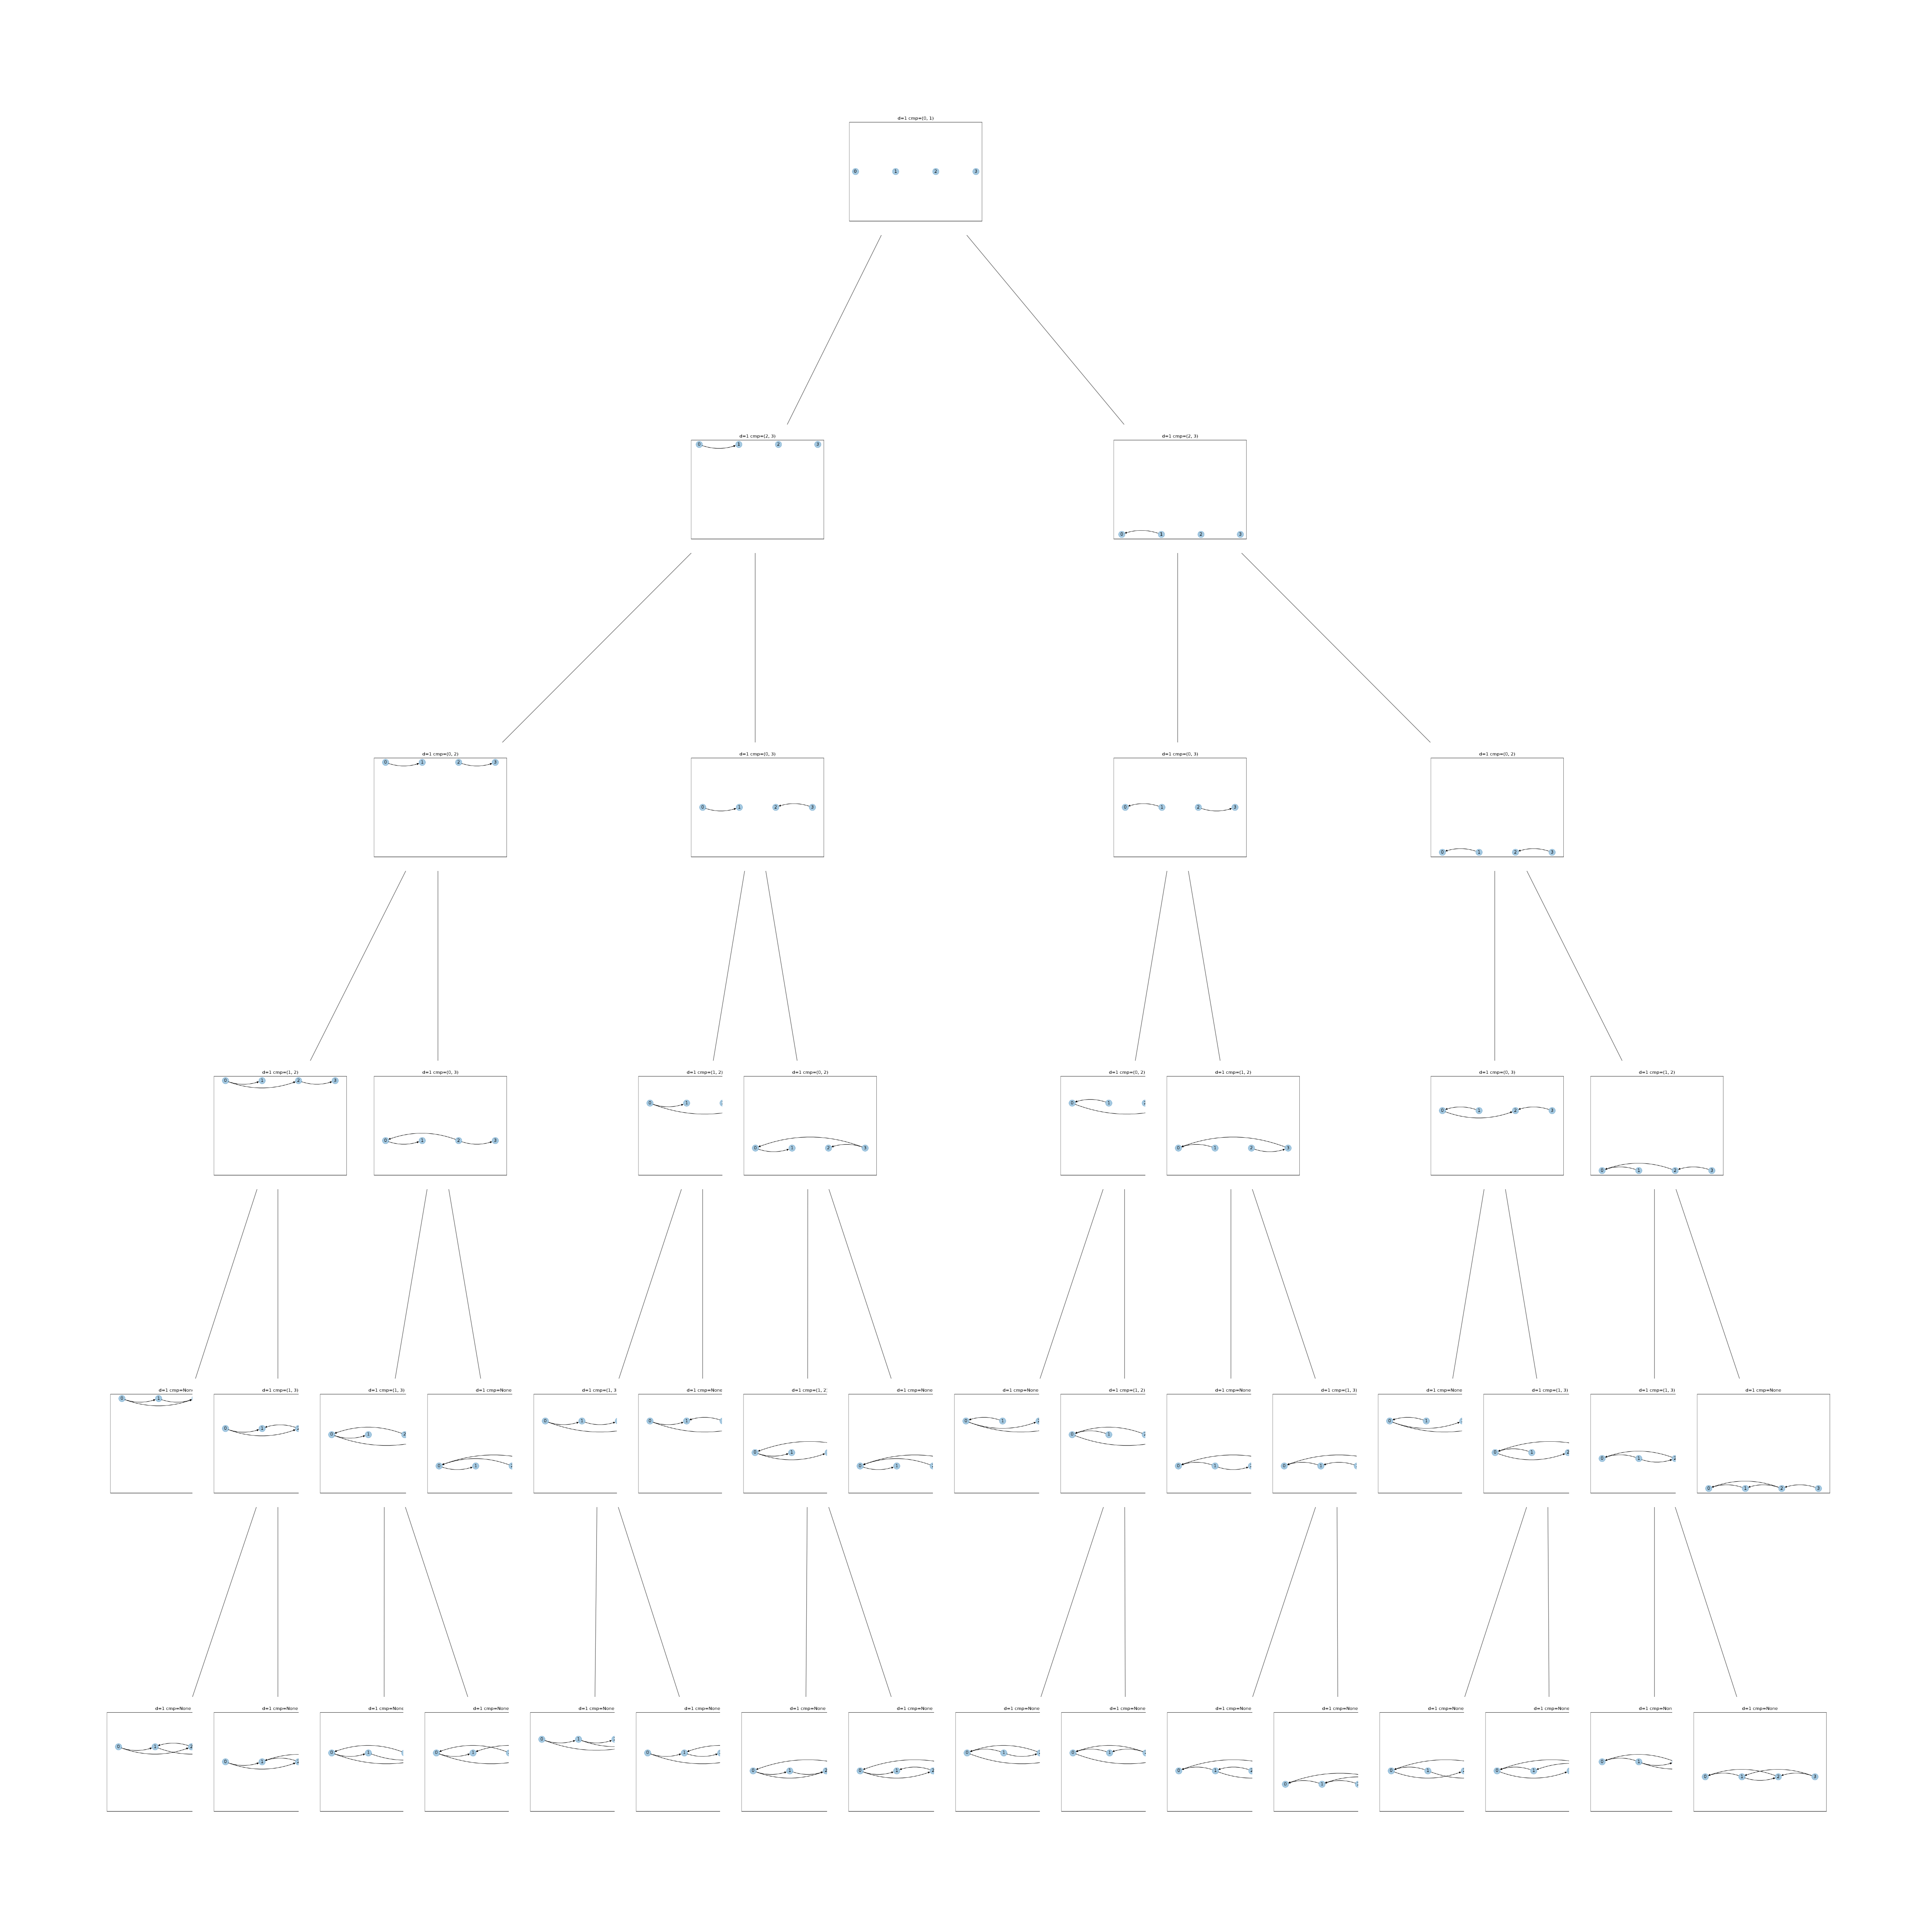

In [8]:
print_nxtree(nxtree)